<a href="https://colab.research.google.com/github/Osterne/codes_DS_course/blob/main/05_mod_ap_n_sup_03_mistura_normais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

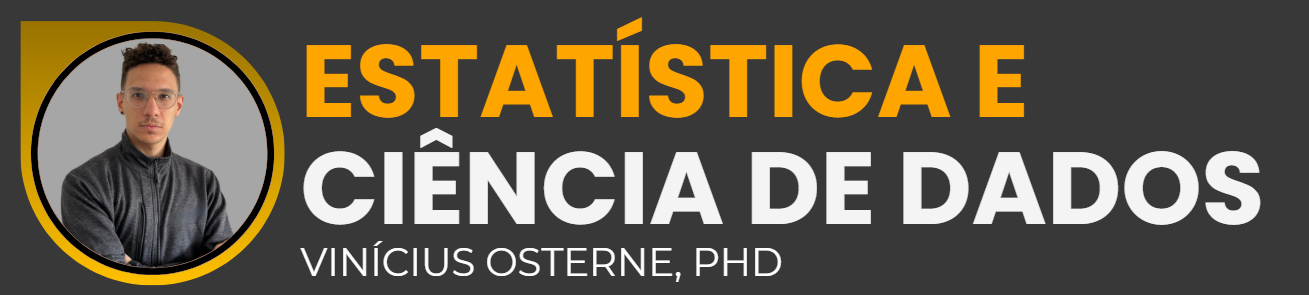

---

# Aprendizado N√£o Supervisionado - M√©todos de Clusteriza√ß√£o Probabil√≠stica

### Mistura de Normais / Gaussian Mixture Model (GMM)



---
<br><br><br><br><br>

# Introdu√ß√£o

- O **Gaussian Mixture Model (GMM)** √© um algoritmo de **aprendizado n√£o supervisionado**, pertencente √† categoria de **agrupamento probabil√≠stico**.  
- Seu objetivo √© **modelar os dados como uma combina√ß√£o de distribui√ß√µes gaussianas (normais)**, em que cada cluster √© representado por uma gaussiana com sua pr√≥pria m√©dia e matriz de covari√¢ncia.  
- Diferente do K-means, que faz uma atribui√ß√£o **dura** (cada ponto pertence a apenas um cluster), o GMM permite atribui√ß√µes **probabil√≠sticas** (*soft clustering*), indicando a probabilidade de cada ponto pertencer a cada cluster.  
- Na pr√°tica, o GMM √© √∫til para identificar **clusters el√≠pticos ou com formas mais complexas**, que o K-means n√£o consegue capturar.  

### Quando usar
- Quando os clusters n√£o s√£o esf√©ricos (ex.: t√™m formas alongadas ou vari√¢ncias diferentes).  
- Quando se deseja obter **probabilidades de pertencimento** em vez de atribui√ß√µes r√≠gidas.  
- Em aplica√ß√µes como:  
  - **Reconhecimento de fala** (modelagem de sons).  
  - **Vis√£o computacional** (segmenta√ß√£o de imagens).  
  - **Modelagem de dados financeiros** (detec√ß√£o de regimes de mercado).  

### Condi√ß√µes impl√≠citas
- Assume que os clusters seguem distribui√ß√µes **aproximadamente gaussianas**.  
- Requer que as vari√°veis estejam na mesma escala (normaliza√ß√£o recomendada).  
- Pode ser influenciado por **outliers**, pois eles distorcem a estima√ß√£o das gaussianas.  
- O n√∫mero de componentes (clusters) precisa ser escolhido ou validado com crit√©rios estat√≠sticos.  

> ‚ö†Ô∏è **Aten√ß√£o**: GMM pode sofrer de **overfitting** se o n√∫mero de componentes for muito alto ou se os dados n√£o tiverem estrutura gaussiana.  

<br><br><br>


# Estrutura do Modelo

### Ideia central
- O GMM assume que os dados s√£o gerados por uma mistura de $K$ distribui√ß√µes gaussianas.  
- Cada componente tem par√¢metros pr√≥prios:  
  - **$\mu_k$**: vetor de m√©dias.  
  - **$\Sigma_k$**: matriz de covari√¢ncia.  
  - **$\pi_k$**: peso do componente (propor√ß√£o de pontos).  

### Fun√ß√£o de verossimilhan√ßa
O modelo procura maximizar a verossimilhan√ßa dos dados sob a mistura:

$$
p(x) = \sum_{k=1}^K \pi_k \, N(x \mid \mu_k, \Sigma_k)
$$

onde $N(x \mid \mu_k, \Sigma_k)$ √© a densidade da normal multivariada.  

<br><br><br>


# Algoritmo EM (Expectation-Maximization)

1. **Inicializar** os par√¢metros ($\mu_k$, $\Sigma_k$, $\pi_k$), muitas vezes usando K-means.  
2. **E-step (Expectation)**: calcular a probabilidade de cada ponto pertencer a cada cluster.  
3. **M-step (Maximization)**: atualizar $\mu_k$, $\Sigma_k$ e $\pi_k$ maximizando a verossimilhan√ßa com base nas probabilidades calculadas.  
4. **Repetir** E-step e M-step at√© converg√™ncia (quando a varia√ß√£o da log-verossimilhan√ßa se torna m√≠nima).  

> üîÑ O algoritmo sempre converge, mas pode parar em **m√°ximos locais**, por isso costuma-se rodar v√°rias inicializa√ß√µes.  

<br><br><br>


# Escolha do n√∫mero de clusters

- O n√∫mero de componentes ($K$) pode ser escolhido usando crit√©rios de informa√ß√£o:  
  - **AIC (Akaike Information Criterion)**  
  - **BIC (Bayesian Information Criterion)**  
  - Ambos penalizam modelos mais complexos, evitando overfitting.  

- Tamb√©m √© poss√≠vel avaliar a qualidade dos clusters com m√©tricas como **Silhouette Score** ou an√°lise visual.  

> üìå Em aplica√ß√µes pr√°ticas, a escolha de $K$ deve equilibrar **ajuste estat√≠stico (AIC/BIC)** e **interpreta√ß√£o dos clusters**.  

<br><br><br>


# Aplica√ß√£o
- Vamos ilustrar o **Gaussian Mixture Model (GMM)** utilizando uma aplica√ß√£o em **dados reais** (Palmer Penguins).  
- Usaremos vari√°veis num√©ricas (comprimento do bico, profundidade do bico, comprimento da nadadeira e massa corporal).  
- Compararemos os resultados com o K-means para mostrar como o GMM captura clusters mais flex√≠veis.

> Objetivo: identificar grupos de vinhos com base em caracter√≠sticas qu√≠micas sem usar a informa√ß√£o das cultivares reais.


In [11]:
# ## 1) Setup
# - Importar bibliotecas
# - Carregar dataset real (Wine)

# %%
!pip -q install scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [12]:
# ## 2) Carregar e explorar os dados
# O dataset Wine possui:
# - 178 vinhos de 3 cultivares diferentes
# - 13 vari√°veis qu√≠micas (√°lcool, acidez, magn√©sio, fen√≥is, etc.)

# %%
wine = load_wine()
X_raw = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = wine.target  # r√≥tulos reais (n√£o usados no GMM)

print(X_raw.shape)
X_raw.head()


(178, 13)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [13]:
# ## 3) Padroniza√ß√£o
# √â fundamental padronizar para que todas as vari√°veis tenham mesma escala.

# %%
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)


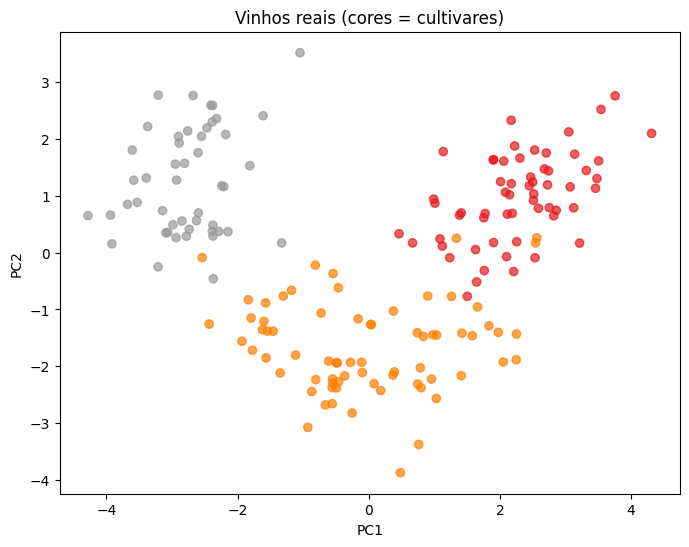

In [14]:
# ## 4) Redu√ß√£o de Dimens√£o (PCA para visualiza√ß√£o): usando os r√≥tulos reais
# Vamos reduzir para 2 componentes principais apenas para plotar.

# %%
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_true, cmap="Set1", alpha=0.7)
plt.title("Vinhos reais (cores = cultivares)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


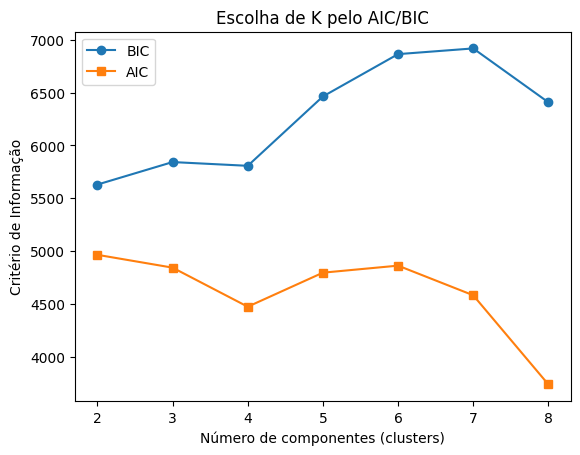

Melhor n√∫mero de componentes (via BIC): 2


In [15]:
# ## 5) Ajustar o modelo GMM
# Testaremos 2 a 8 componentes (clusters) e escolheremos o melhor via BIC.

# %%
n_components = np.arange(2, 9)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X)
          for n in n_components]

bics = [m.bic(X) for m in models]
aics = [m.aic(X) for m in models]

plt.plot(n_components, bics, marker='o', label="BIC")
plt.plot(n_components, aics, marker='s', label="AIC")
plt.xlabel("N√∫mero de componentes (clusters)")
plt.ylabel("Crit√©rio de Informa√ß√£o")
plt.title("Escolha de K pelo AIC/BIC")
plt.legend()
plt.show()

best_n = n_components[np.argmin(bics)]
print(f"Melhor n√∫mero de componentes (via BIC): {best_n}")


In [16]:
# ## 6) Treinar GMM com o n√∫mero de clusters escolhido
# Tamb√©m salvamos as probabilidades de pertencimento (soft clustering).

# %%
gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X)
probs = gmm.predict_proba(X)  # probabilidades de cada cluster

print("Exemplo de probabilidades (primeiras linhas):")
print(pd.DataFrame(probs).head())


Exemplo de probabilidades (primeiras linhas):
     0             1
0  1.0  2.639315e-43
1  1.0  4.787913e-36
2  1.0  6.055181e-46
3  1.0  2.013129e-67
4  1.0  1.245628e-17


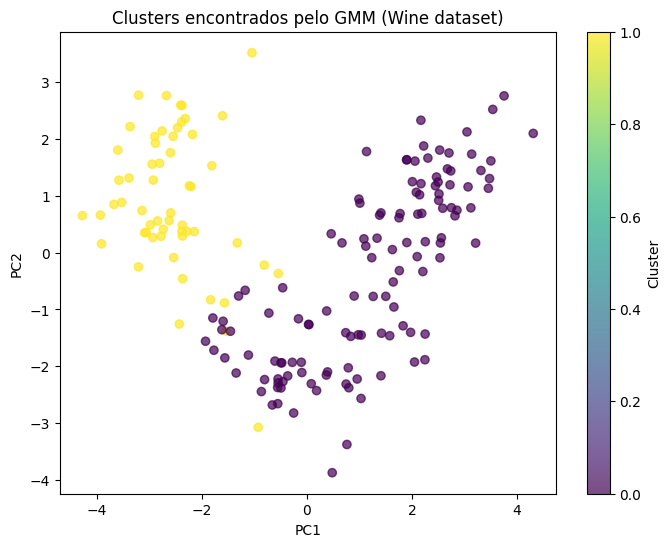

In [17]:
# ## 7) Visualiza√ß√£o em 2D (PCA) dos clusters GMM

# %%
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_gmm, cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters encontrados pelo GMM (Wine dataset)")
plt.colorbar(label="Cluster")
plt.show()


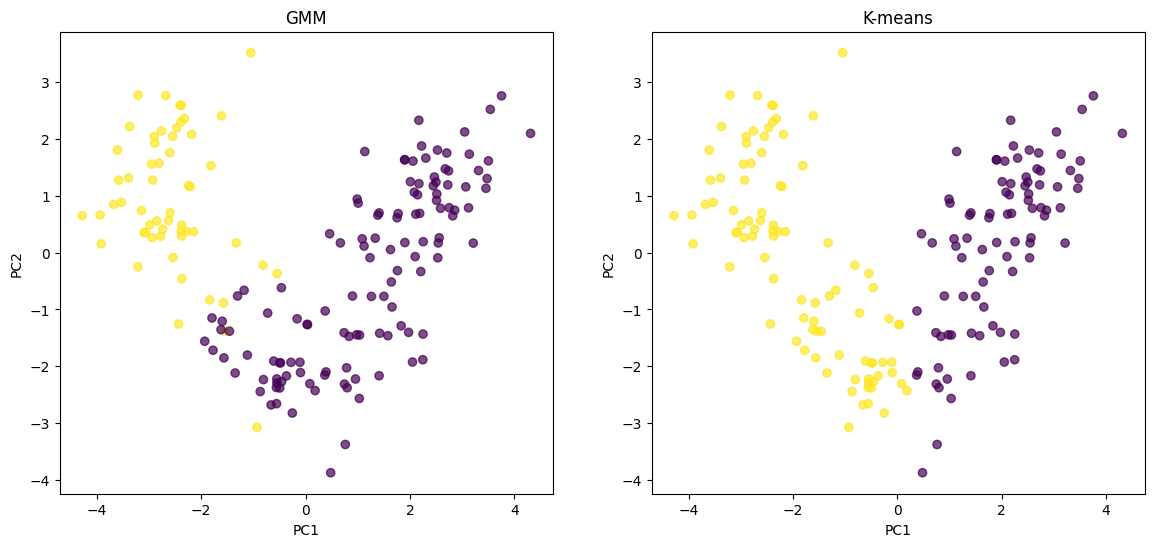

In [18]:
# ## 8) Compara√ß√£o com K-means
# Vamos rodar K-means com o mesmo n√∫mero de clusters e comparar resultados.

# %%
kmeans = KMeans(n_clusters=best_n, n_init=30, random_state=42)
labels_km = kmeans.fit_predict(X)

fig, axs = plt.subplots(1, 2, figsize=(14,6))
axs[0].scatter(X_pca[:,0], X_pca[:,1], c=labels_gmm, cmap="viridis", alpha=0.7)
axs[0].set_title("GMM")

axs[1].scatter(X_pca[:,0], X_pca[:,1], c=labels_km, cmap="viridis", alpha=0.7)
axs[1].set_title("K-means")

for ax in axs:
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.show()


In [19]:
# ## 9) Avalia√ß√£o
# Podemos avaliar com Silhouette Score.

# %%
print(f"Silhouette (GMM, k={best_n}): {silhouette_score(X, labels_gmm):.3f}")
print(f"Silhouette (K-means, k={best_n}): {silhouette_score(X, labels_km):.3f}")


Silhouette (GMM, k=2): 0.268
Silhouette (K-means, k=2): 0.259


In [20]:
#Ambos os m√©todos encontraram clusters fracos/moderados (valores perto de 0, longe de 1).
#O GMM teve uma separa√ß√£o ligeiramente melhor que o K-means (0.268 vs 0.259), mas a diferen√ßa √© pequena.
#Com K=2, os grupos n√£o est√£o super bem definidos ‚Äî talvez seja interessante testar K=3 (at√© porque o dataset Wine tem 3 classes reais).